In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]

'0'

In [3]:
size = 256
import cv2
import os
trainImgs = []
trainMaps = []
images = []
for file in os.listdir("maps/train"):
    image = cv2.imread(f"maps/train/{file}")
    image = cv2.resize(image, (2*size,size))
    images.append(image)
    img, map = image[:, :size], image[:, size:]
    trainImgs.append(img)
    trainMaps.append(map)
trainMaps = np.array(trainMaps)
trainImgs = np.array(trainImgs)

print('loaded training images',len(trainMaps))
testImgs = []
testMaps = []
for file in os.listdir("maps/val"):
    image = cv2.imread(f"maps/val/{file}")
    image = cv2.resize(image, (2*size,size))
    images.append(image)
    img, map = image[:, :size], image[:, size:]
    testImgs.append(img)
    testMaps.append(map)
testMaps = np.array(testMaps)
testImgs = np.array(testImgs)



print('loaded test images',len(testMaps))


loaded training images 1096
loaded test images 1098


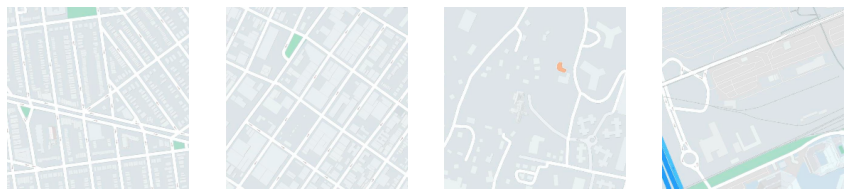

In [4]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(15, 15))
n = 4
x = 1
for i in range(n):
    ax = plt.subplot(2, n, x)
    x = x + 1
    plt.imshow(trainMaps[i])
    plt.axis("off")
plt.show()

In [5]:
def show_images(testSamples,txt):
    #testSamples = trainMaps
    resultSamples = autoencoder.predict(testSamples[:10])
    n = 4
    plt.figure(figsize=(15, 15))

    print('Original',txt,'images')
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(testSamples[i].reshape((size,size,3)))
        #plt.gray()
        plt.axis("off")
    plt.show()


    plt.figure(figsize=(15, 15))
    print('Reconstructed',txt,'images')
    for i in range(n):
        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(resultSamples[i].reshape((size,size,3)))
        plt.axis("off")
    #plt.savefig('transpose.png')
    plt.show()

In [6]:
trainMaps = np.array(trainMaps)
trainMaps = trainMaps.astype('float32') / 255.0
testMaps = testMaps.astype('float32') / 255.0
print("images",trainMaps.shape)

flatMaps = trainMaps.reshape(len(trainMaps),-1)
print("flat",flatMaps.shape)


images (1096, 256, 256, 3)
flat (1096, 196608)


In [7]:
#import importlib
#importlib.reload(autoencoders)
import autoencoders
input_size = size*size*3
code_size = 500

autoencoder = autoencoders.upsampling_model((size,size,3))
autoencoder = autoencoders.transpose_model((size,size,3))
autoencoder = autoencoders.unet_model((size,size,3))

autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
#autoencoder.fit(trainMaps, trainMaps, epochs=10, batch_size=16)
#autoencoder.fit(flatMaps, flatMaps, epochs=10)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 3136        input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 128, 128, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 128)  131200      leaky_re_lu[0][0]                
______________________________________________________________________________________________

137/137 [==============================] - 33s 191ms/step - loss: 0.8849
Epoch 0
Original training images


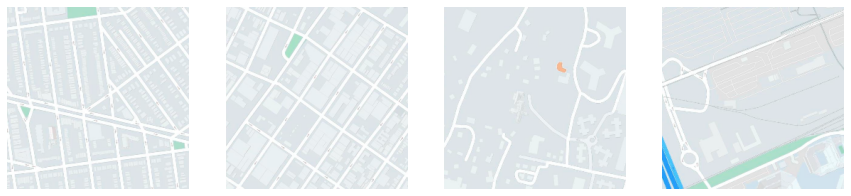

Reconstructed training images


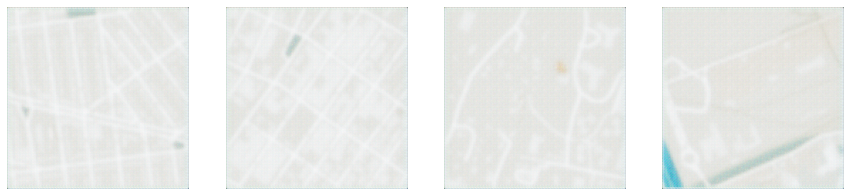

Original test images


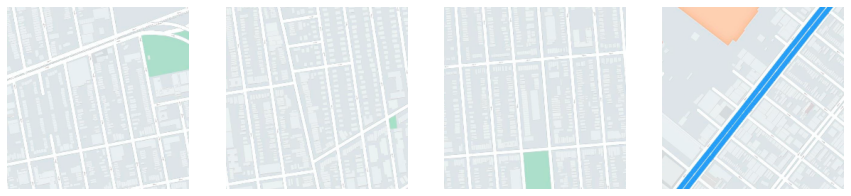

Reconstructed test images


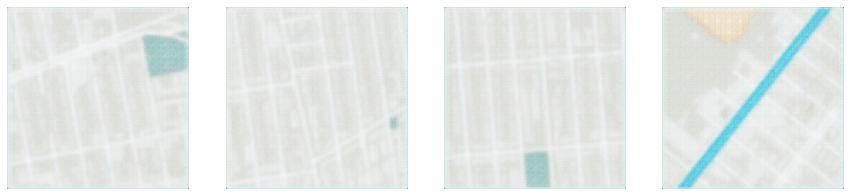

137/137 [==============================] - 27s 194ms/step - loss: 0.3305
Epoch 10
Original training images


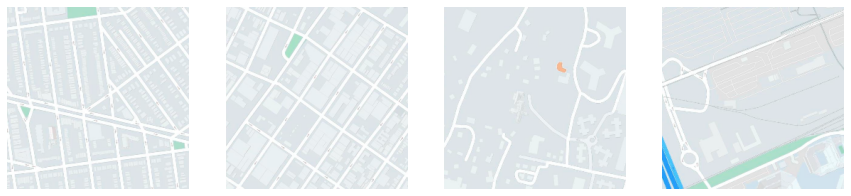

Reconstructed training images


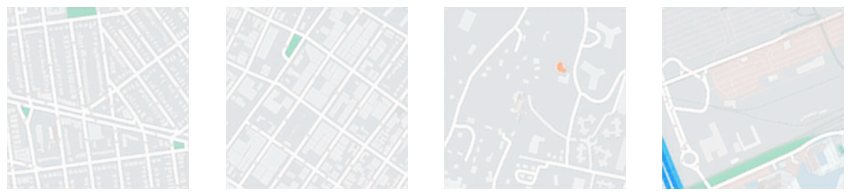

Original test images


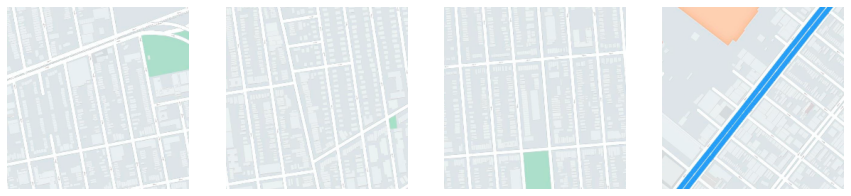

Reconstructed test images


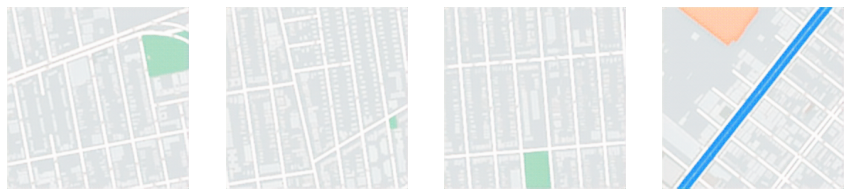

137/137 [==============================] - 26s 192ms/step - loss: 0.3293
Epoch 20
Original training images


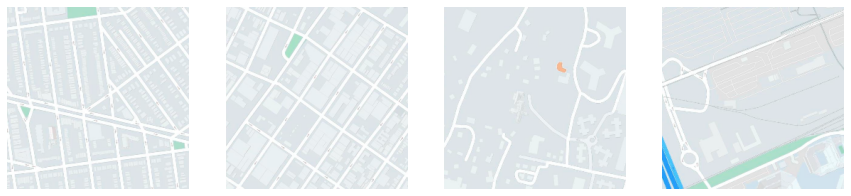

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstructed training images


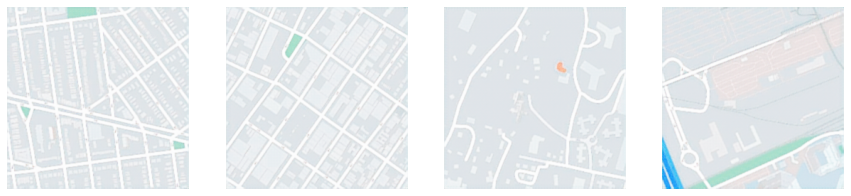

Original test images


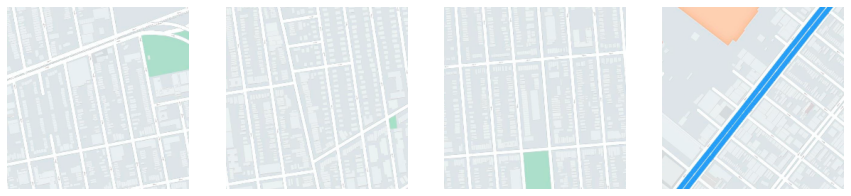

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstructed test images


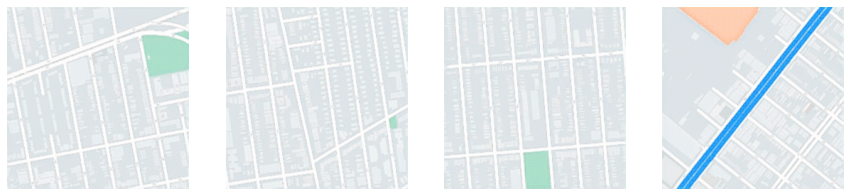

 55/137 [===========>..................] - ETA: 15s - loss: 0.3287

KeyboardInterrupt: 

In [8]:
#autoencoder.fit(trainSamples_noisy, trainSamples, epochs=5)
for epoch in range(100):
    autoencoder.fit(trainMaps, trainMaps, batch_size=8, epochs=1)
    ##autoencoder.fit(flatMaps, flatMaps, epochs=1)
    if epoch%10==0:
        print("Epoch",epoch)
        show_images(trainMaps,'training')
        show_images(testMaps,'test')
    

In [ ]:
# testSamples = flatMaps
# resultSamples = autoencoder.predict(testSamples)

#plt.imshow(testSamples[i].reshape((size,size,3))*255)
testSamples[i].min()

cv2.imwrite("test.png",testSamples[i].reshape((size,size,3))*255)
plt.imshow((testSamples[i].reshape((size,size,3))))